In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
crop_df = pd.read_csv('crop_production.csv')


In [ ]:
import seaborn as sns

# Set the color palette
sns.set_palette("deep")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                                                     "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])


In [ ]:
# Calculate crop yield and add a new column to the dataset
crop_df['Yield'] = crop_df['Production'] / crop_df['Area']

# Print the updated dataset to check the new column
print(crop_df.head())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production     Yield  
0             Arecanut  1254.0      2000.0  1.594896  
1  Other Kharif pulses     2.0         1.0  0.500000  
2                 Rice   102.0       321.0  3.147059  
3               Banana   176.0       641.0  3.642045  
4            Cashewnut   720.0       165.0  0.229167  


In [ ]:


# Check the shape of the dataset
print(f"Number of Rows: {crop_df.shape[0]}")
print(f"Number of Columns: {crop_df.shape[1]}")

# Display the first 5 rows of the dataset
crop_df.head()


Number of Rows: 246091
Number of Columns: 8


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


In [ ]:
crop_production = crop_df

In [ ]:
print(crop_df.info())

print(crop_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
 7   Yield          242361 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.0+ MB
None
           Crop_Year          Area    Production          Yield
count  246091.000000  2.460910e+05  2.423610e+05  242361.000000
mean     2005.643018  1.200282e+04  5.825034e+05      41.649059
std         4.952164  5.052340e+04  1.706581e+07     817.572839
min      1997.000000  4.000000e-02  0.000000e+00       0.000000
25%      2002.000000  8.000000e+01  8.800000e+01    

In [ ]:
crop_production.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield'],
      dtype='object')

# Overall EDA

*The overall analysis of the crop production dataset provides us with a bird's eye view of the agricultural scenario in India. This section includes visualizations such as the distribution of crop production and yield across different crops, the highest yield states, the best years of production, and other key indicators that help us understand the crop production trends in India*.

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64


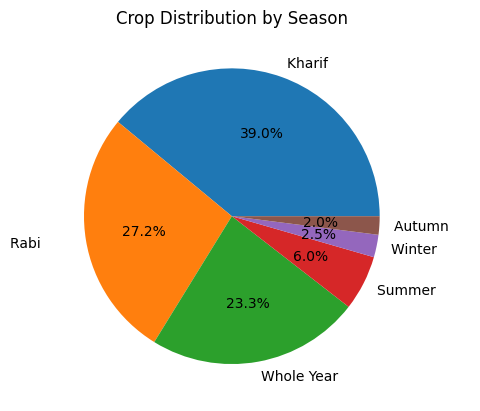

In [ ]:
season_counts = crop_df['Season'].value_counts()
print(season_counts)

plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%' )
plt.title('Crop Distribution by Season')
plt.show()


State_Name
Kerala                         9.788005e+10
Andhra Pradesh                 1.732459e+10
Tamil Nadu                     1.207644e+10
Uttar Pradesh                  3.234493e+09
Assam                          2.111752e+09
West Bengal                    1.397904e+09
Maharashtra                    1.263641e+09
Karnataka                      8.634298e+08
Andaman and Nicobar Islands    7.182232e+08
Punjab                         5.863850e+08
Name: Production, dtype: float64


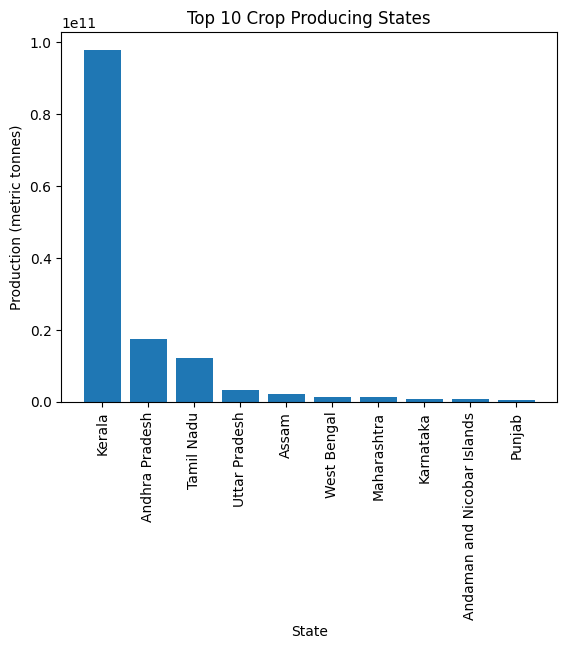

In [ ]:
state_production = crop_df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)
top_states = state_production.head(10)

print(top_states)

plt.bar(top_states.index, top_states.values , color='C0')
plt.xticks(rotation=90)
plt.title('Top 10 Crop Producing States')
plt.xlabel('State')
plt.ylabel('Production (metric tonnes)')
plt.show()


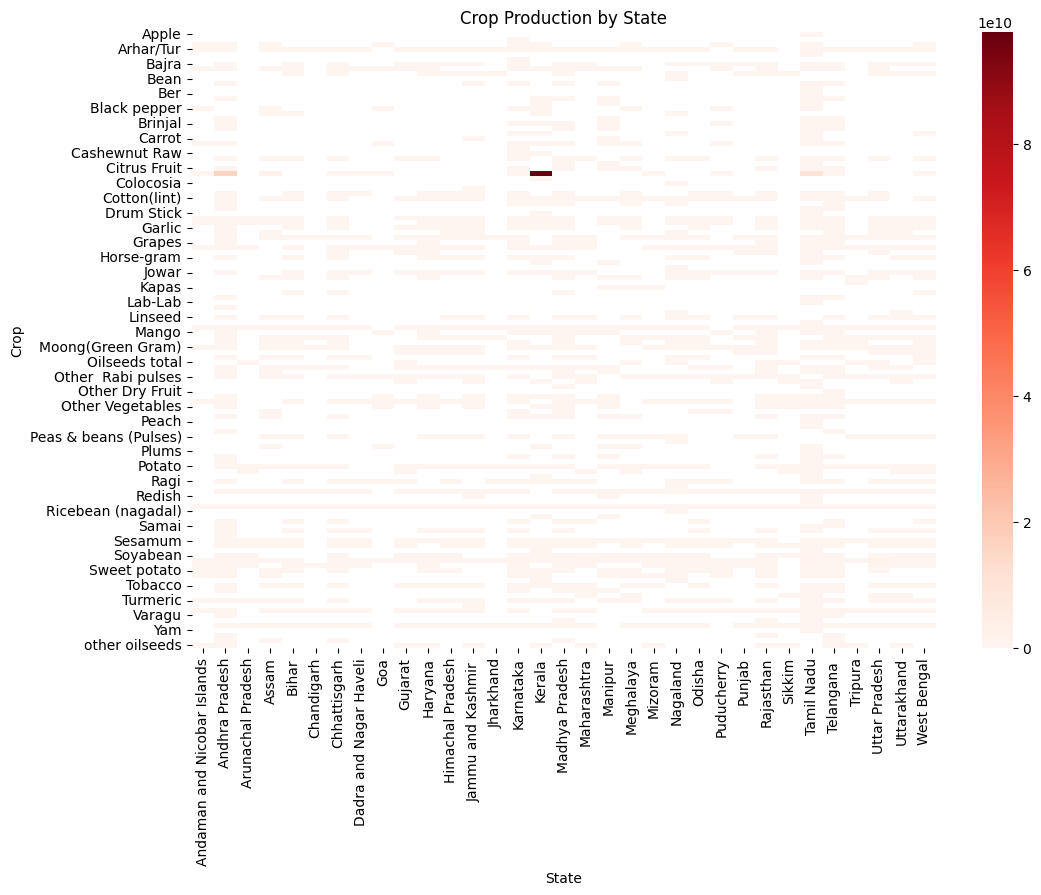

In [ ]:
crop_state_pivot = crop_df.pivot_table(index='Crop', columns='State_Name', values='Production', aggfunc=np.sum)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_state_pivot, cmap='Reds')
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Crop')
plt.show()


<Figure size 1000x600 with 0 Axes>

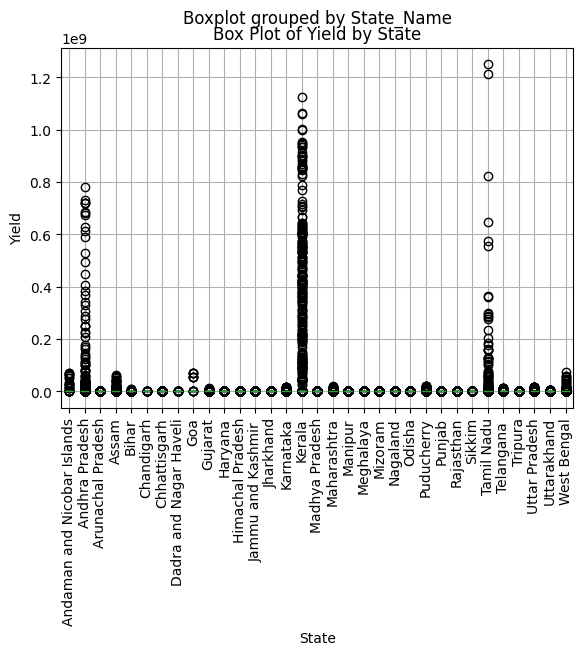

In [ ]:
# Box plot of yield by state
plt.figure(figsize=(10, 6))
crop_production.boxplot(column='Production', by='State_Name')
plt.xlabel("State")
plt.ylabel("Yield")
plt.title("Box Plot of Yield by State")
plt.xticks(rotation=90)
plt.show()

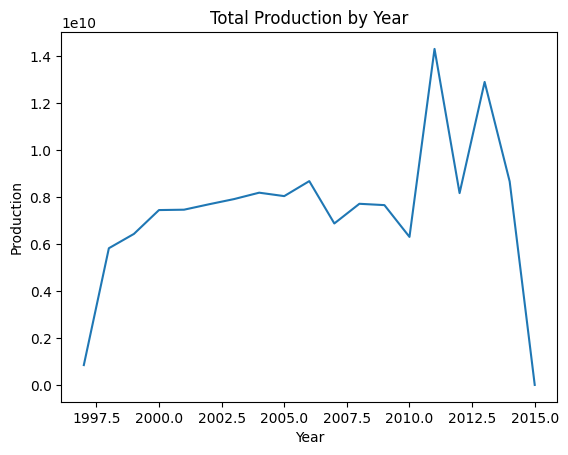

In [ ]:
# Line chart of total production by year
yearly_production = crop_production.groupby('Crop_Year').agg({'Production': 'sum'})
plt.plot(yearly_production.index, yearly_production.Production)
plt.xlabel("Year")
plt.ylabel("Production")
plt.title("Total Production by Year")
plt.show()

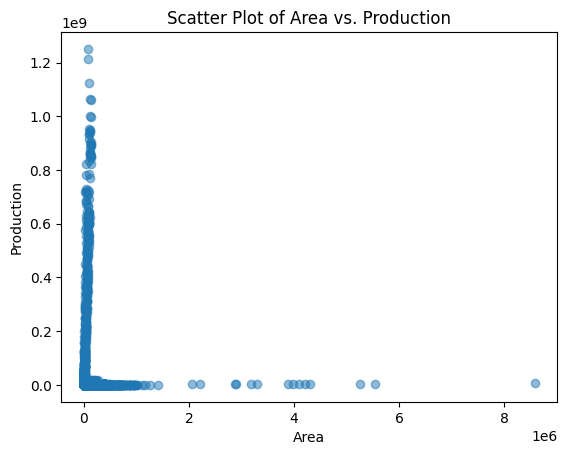

In [ ]:
# Scatter plot of area vs. production
plt.scatter(crop_production.Area, crop_production.Production, alpha=0.5)
plt.xlabel("Area")
plt.ylabel("Production")
plt.title("Scatter Plot of Area vs. Production")
plt.show()

<ipython-input-31-cad3785df8fb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crop_mean_yield = crop_df.groupby('Crop')['Production', 'Area'].sum().apply(lambda x: x['Production']/x['Area'], axis=1).sort_values(ascending=False)


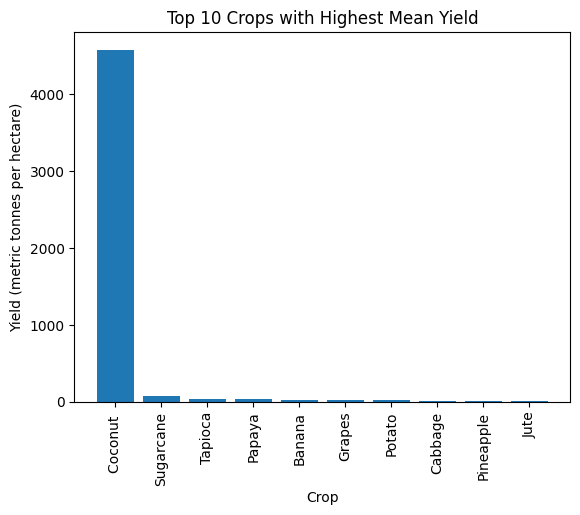

In [ ]:
# Calculate the mean yield for each crop
crop_mean_yield = crop_df.groupby('Crop')['Production', 'Area'].sum().apply(lambda x: x['Production']/x['Area'], axis=1).sort_values(ascending=False)

# Get the top 10 crops with the highest mean yield
top_crop_mean_yield = crop_mean_yield.head(10)

# Plot a bar chart of the top 10 crops with the highest mean yield
plt.bar(top_crop_mean_yield.index, top_crop_mean_yield.values)
plt.xticks(rotation=90)
plt.title('Top 10 Crops with Highest Mean Yield')
plt.xlabel('Crop')
plt.ylabel('Yield (metric tonnes per hectare)')
plt.show()


The overall analysis of the crop production dataset shows that Coconut is the most produced crop in India followed by Sugarcane and then Tapioca. The states of Kerala, Andhra Pradesh, have consistently been among the top producers of crops in India owing to their coconut production. For the seasons kharif has the highrst produce followed by rabi. The data also shows a consistent increase in the production of crops in India over the years with a maxima in 2012.

# Statewise Analaysis

The state-wise analysis section allows us to delve deeper into the crop production trends of individual states. It includes visualizations such as the top crops produced in each state, the highest yield districts, and the best seasons for specific crops. This section enables us to identify the most productive states and the factors that contribute to their success.

In [ ]:
# Select the state to analyze
state = 'Uttar Pradesh'

# Filter the dataset for the selected state

state_df = crop_df[crop_df['State_Name'] == state]

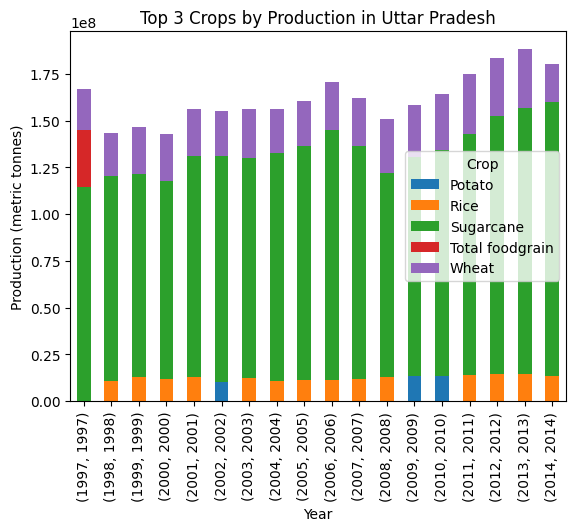

In [ ]:
# Group the dataset by year and crop and calculate the total production
year_crop_production = state_df.groupby(['Crop_Year', 'Crop'])['Production'].sum()

# Get the top 3 crops by production for each year
top_year_crop_production = year_crop_production.groupby('Crop_Year').nlargest(3)

# Unstack the multi-indexed dataframe for plotting
top_year_crop_production = top_year_crop_production.unstack()

# Plot a stacked bar chart of the top 3 crops by production for each year
top_year_crop_production.plot(kind='bar', stacked=True)
plt.title(f'Top 3 Crops by Production in {state}')
plt.xlabel('Year')
plt.ylabel('Production (metric tonnes)')
plt.legend(title='Crop')
plt.show()


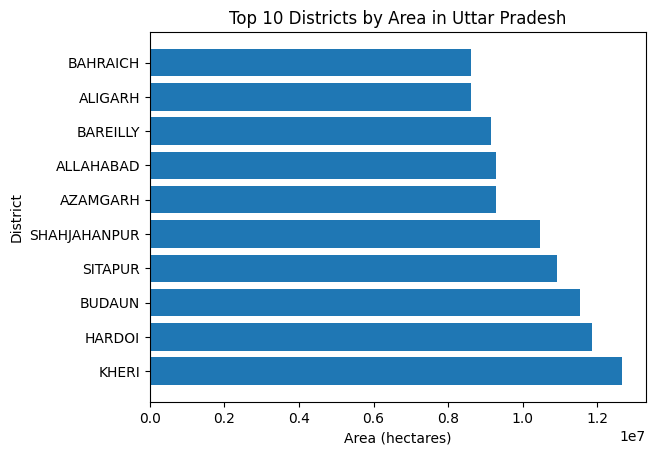

In [ ]:
# Group the dataset by district and calculate the total area
district_area = state_df.groupby('District_Name')['Area'].sum()

# Get the top 10 districts by area
top_districts = district_area.nlargest(10)

# Plot a horizontal bar chart of the top 10 districts by area
plt.barh(top_districts.index, top_districts.values)
plt.title(f'Top 10 Districts by Area in {state}')
plt.xlabel('Area (hectares)')
plt.ylabel('District')
plt.show()


<ipython-input-77-b65d7b01201f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_crop_yield = state_df.groupby(['Season', 'Crop'])['Production', 'Area'].sum().apply(lambda x: x['Production']/x['Area'], axis=1)


Text(0, 0.5, 'Yield (metric tonnes per hectare)')

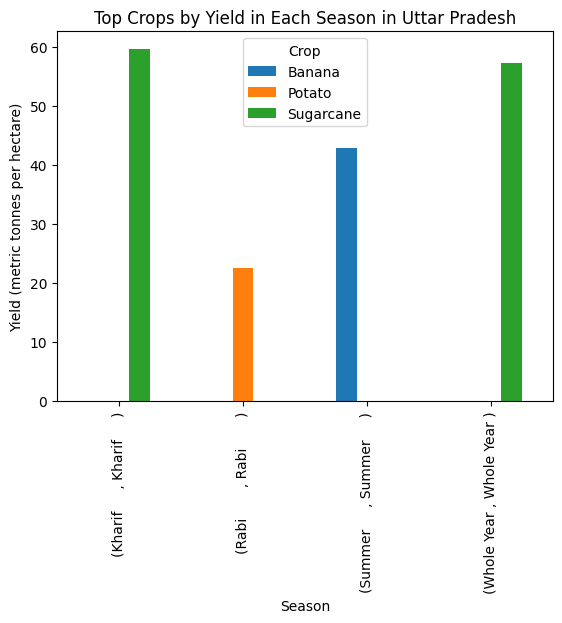

In [ ]:
# Group the dataset by season and crop and calculate the mean yield
season_crop_yield = state_df.groupby(['Season', 'Crop'])['Production', 'Area'].sum().apply(lambda x: x['Production']/x['Area'], axis=1)

# Get the top crop by yield for each season
top_season_crop_yield = season_crop_yield.groupby('Season').nlargest(1)

# Unstack the multi-indexed dataframe for plotting
top_season_crop_yield = top_season_crop_yield.unstack()

# Plot a bar chart of the top crop by yield for each season
top_season_crop_yield.plot(kind='bar')
plt.title(f'Top Crops by Yield in Each Season in {state}')
plt.xlabel('Season')
plt.ylabel('Yield (metric tonnes per hectare)')
# plt.legend(title='

 The state-wise analysis of the crop production data shows us details about things like top crops by season, districts with nax area and the top 3 crops per state. Here we can see the results for UP which has highest yield in khabi season, kheri is the district with max area and top3 crops are sugarcane wheat and rice

# YearWise analysis

The year-wise analysis section helps us understand the crop production trends over the years. It includes visualizations such as the top crops produced each year, the highest yield districts and states, and the overall production trends. This section allows us to identify the years with the highest and lowest production, enabling us to understand the factors that influence crop production in India.

In [ ]:
# Select year to analyze
year = 2013

# Filter dataset for selected year
year_df = crop_df[crop_df["Crop_Year"] == year]

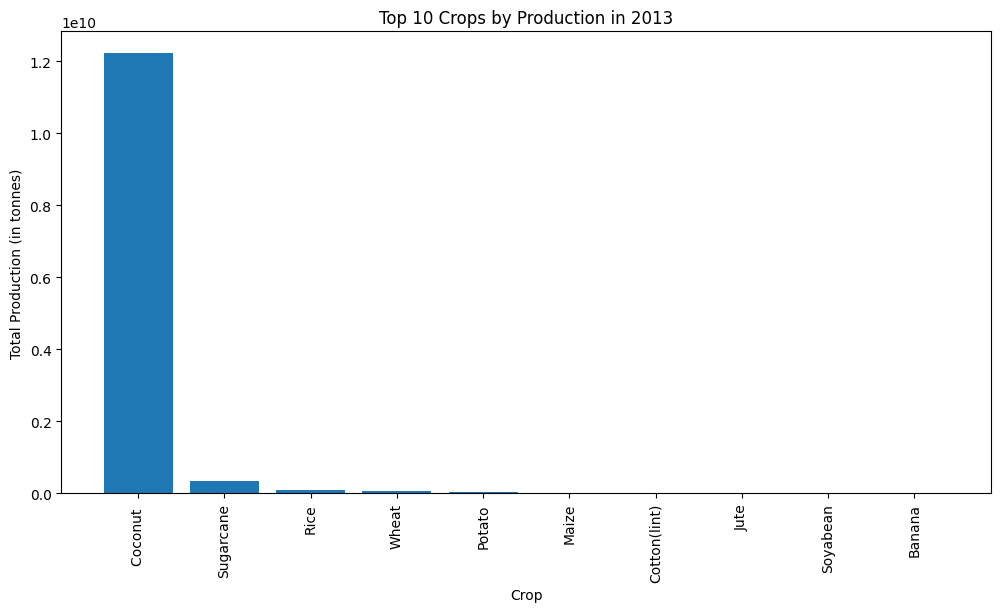

In [ ]:
# Group dataset by crop and calculate the total production for each crop
crop_production_grouped = year_df.groupby("Crop")["Production"].sum().reset_index()

# Sort the resulting dataframe by production in descending order
crop_production_sorted = crop_production_grouped.sort_values(by="Production", ascending=False)

# Plot a bar chart of the top 10 crops by production
plt.figure(figsize=(12, 6))
plt.bar(crop_production_sorted["Crop"][:10], crop_production_sorted["Production"][:10])
plt.title("Top 10 Crops by Production in {}".format(year))
plt.xlabel("Crop")
plt.xticks(rotation=90)
plt.ylabel("Total Production (in tonnes)")
plt.show()


<ipython-input-72-50771206a6cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["Yield"] = year_df["Production"] / year_df["Area"]


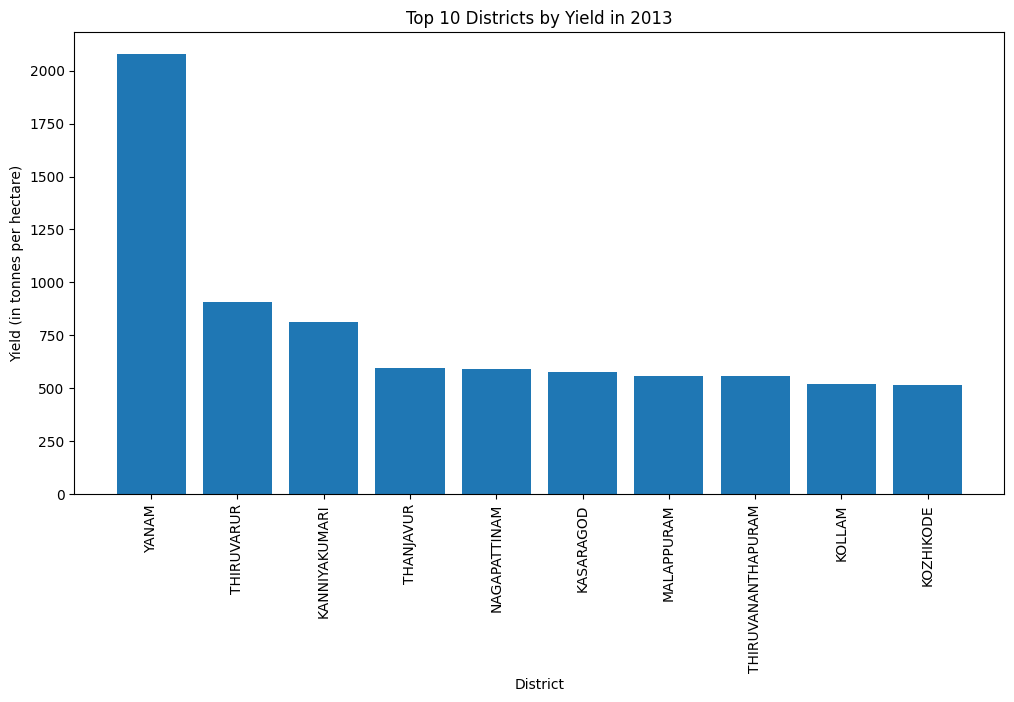

In [ ]:
# Calculate yield for each district
year_df["Yield"] = year_df["Production"] / year_df["Area"]

# Group dataset by district and calculate the average yield for each district
district_yield_grouped = year_df.groupby("District_Name")["Yield"].mean().reset_index()

# Sort the resulting dataframe by yield in descending order
district_yield_sorted = district_yield_grouped.sort_values(by="Yield", ascending=False)

# Plot a bar chart of the top 10 districts by yield
plt.figure(figsize=(12, 6))
plt.bar(district_yield_sorted["District_Name"][:10], district_yield_sorted["Yield"][:10])
plt.title("Top 10 Districts by Yield in {}".format(year))
plt.xlabel("District")
plt.xticks(rotation=90)
plt.ylabel("Yield (in tonnes per hectare)")
plt.show()


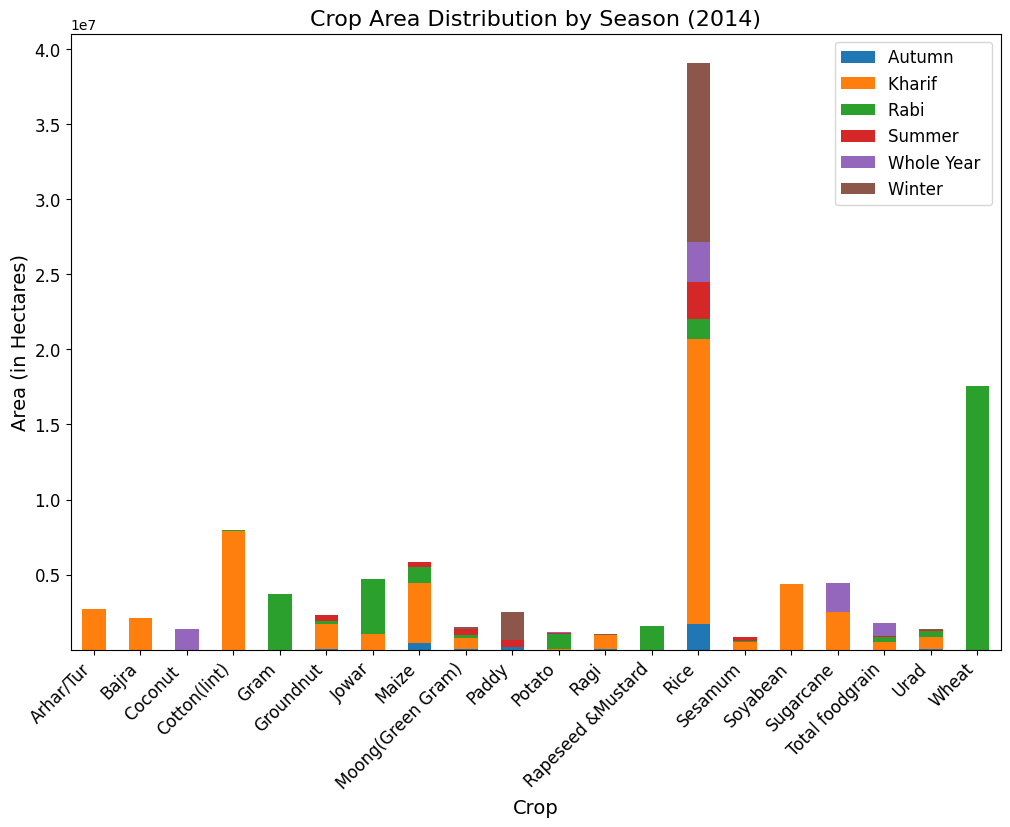

In [ ]:
# Group the data by crop and season and calculate the total area
crop_season_area = crop_df_year.groupby(['Crop', 'Season']).sum()['Area'].reset_index()

# Get the top 20 crops by area
top_20_crops = crop_season_area.groupby('Crop').sum().sort_values('Area', ascending=False).head(20).index
crop_season_area_top20 = crop_season_area[crop_season_area['Crop'].isin(top_20_crops)]

# Pivot the data to create a matrix of crop vs season with area as values
crop_season_area_pivot = crop_season_area_top20.pivot(index='Crop', columns='Season', values='Area')

# Plot a stacked bar chart of crop area distribution by season
crop_season_area_pivot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title(f"Crop Area Distribution by Season ({selected_year})", fontsize=16)
plt.xlabel("Crop", fontsize=14)
plt.ylabel("Area (in Hectares)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

The year-wise analysis of the crop production data shows that the year 2013-2014 saw the highest production of crops in India. The highest yielding crops in terms of production are Coconut ,Sugarcane, Rice. The highest yield by district goes to yanam which belongs to kerala and bags first place owing to coconuts produced there.

# Crop Wise 

*The crop-wise analysis section provides us with a detailed understanding of the production and yield of individual crops in India. It includes visualizations such as the top states, years, and seasons for specific crops, allowing us to identify the most productive regions for each crop. This section helps us understand the crop-specific factors that influence production and yield in India.*

In [ ]:
# Filter the data for a selected crop
selected_crop = 'Wheat'
crop_df_crop = crop_df[crop_df['Crop'] == selected_crop]

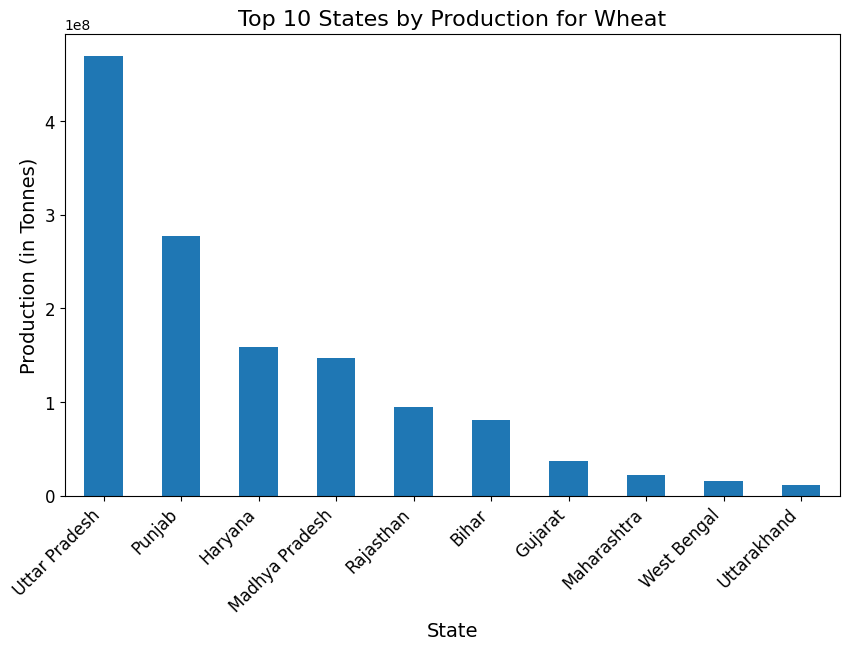

In [ ]:
# Plot the top 10 states by production for the selected crop
crop_df_crop.groupby('State_Name').sum()['Production'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.title(f"Top 10 States by Production for {selected_crop}", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Production (in Tonnes)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

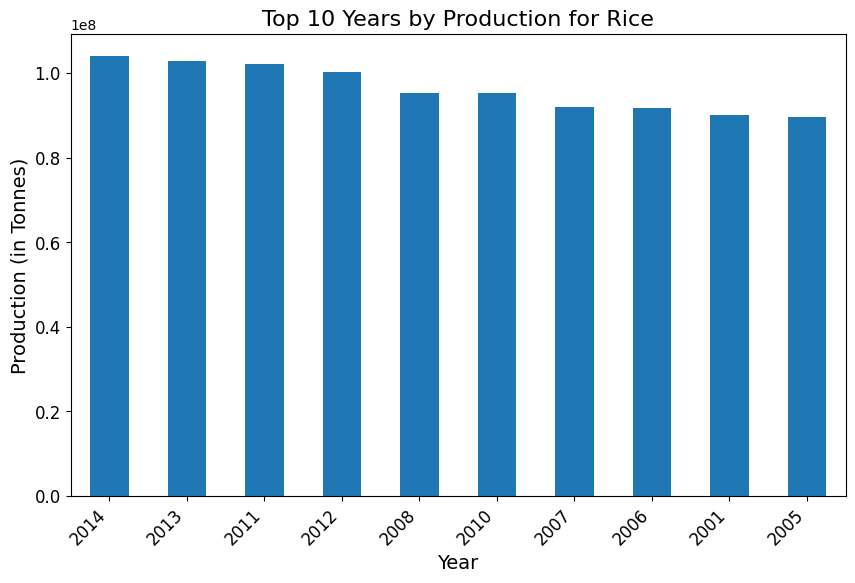

In [ ]:
# Plot the top 10 years by production for the selected crop
crop_df_crop.groupby('Crop_Year').sum()['Production'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.title(f"Top 10 Years by Production for {selected_crop}", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Production (in Tonnes)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-52-50d59c752cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_df_crop["Yield"] = crop_df_crop["Production"] / crop_df_crop["Area"]


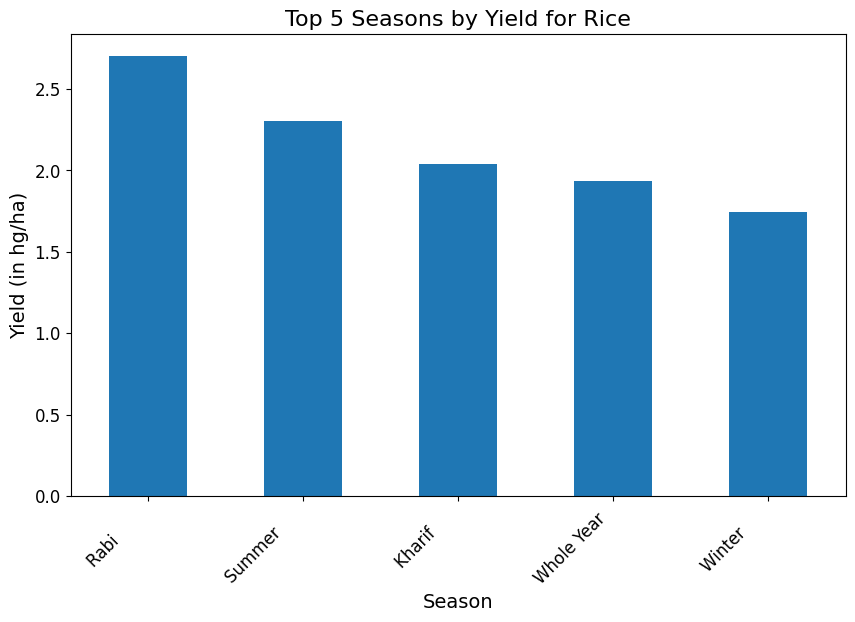

In [ ]:
crop_df_crop["Yield"] = crop_df_crop["Production"] / crop_df_crop["Area"]

crop_df_crop.groupby('Season').mean()['Yield'].sort_values(ascending=False).head(5).plot(kind='bar', figsize=(10,6))
plt.title(f"Top 5 Seasons by Yield for {selected_crop}", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Yield (in hg/ha)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The crop-wise analysis of the crop production data shows that for Rice the top producing states are West Bengal, Uttar Pradesh, and Punjab. The year wise produce increases almost linearly and Rabi is the best season for the crop

# Conclusion

In conclusion, this EDA of the crop production dataset provided valuable insights into the agricultural landscape of India. We explored the overall production, yield, and area distribution for various crops, identified the top producing states and districts, and analyzed the trends and patterns over time.

We also delved deeper into the state-wise, year-wise, and crop-wise analysis, providing detailed visualizations and highlighting the best crops, highest yield districts and states, and the season-wise best crops by yield.

Overall, this EDA can be useful for policy-makers, agricultural experts, and researchers to understand the agricultural productivity of different regions and crops in India and make informed decisions to improve the agricultural sector.